In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [73]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


**Scaling of the variable**

In [93]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pd.DataFrame(scaled_data, columns= data.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.021849,1.263460,-1.341272,-1.312977,-1.224745
5,-0.537178,1.957669,-1.170675,-1.050031,-1.224745
6,-1.506521,0.800654,-1.341272,-1.181504,-1.224745
7,-1.021849,0.800654,-1.284407,-1.312977,-1.224745
8,-1.748856,-0.356361,-1.341272,-1.312977,-1.224745
9,-1.143017,0.106445,-1.284407,-1.444450,-1.224745


**Principal Component Analysis**

[ 0.76590853  0.18427757]


,PC1,PC2
0,-2.576198,0.498650
1,-2.419715,-0.660518
2,-2.662302,-0.326611
3,-2.605790,-0.582925
4,-2.683088,0.666354


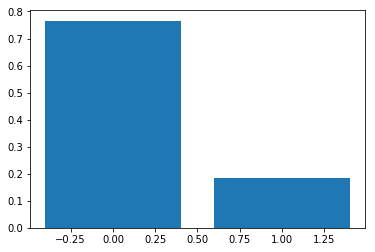

In [95]:
pca = PCA(n_components = 2)
PC_data = pd.DataFrame(pca.fit_transform(scaled_data)).rename({0:'PC1',1:'PC2'}, axis =1)
variance_captured_byeachPC = pca.explained_variance_ratio_
print(variance_captured_byeachPC)
plt.bar(range(len(variance_captured_byeachPC)),variance_captured_byeachPC)
PC_data.head()

**K-Means**

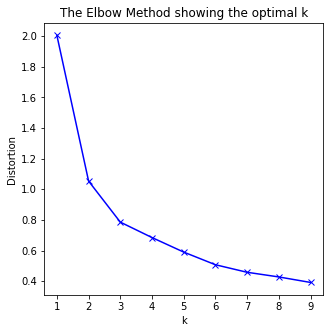

In [105]:
X = PC_data.copy()

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.rcParams['figure.figsize'] = (5,5)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [108]:
#Label each element to a cluster and count number of elements in each cluster
kmeansModel = KMeans(4, random_state= 123).fit(X)
PC_data['Clusters'] = kmeansModel.labels_
PC_data.groupby(['Clusters']).size()

Clusters
0    22
1    35
2    49
3    44
dtype: int64